In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load the dataset
data = pd.read_csv("C:\\Users\\KIRAN\\Downloads\\loan_prediction.csv")
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.size

7982

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [7]:
data.columns=data.columns.str.replace(' ','')

In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
data.fillna(method='ffill',inplace=True)

In [10]:
data.fillna(method='bfill',inplace=True)

In [11]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

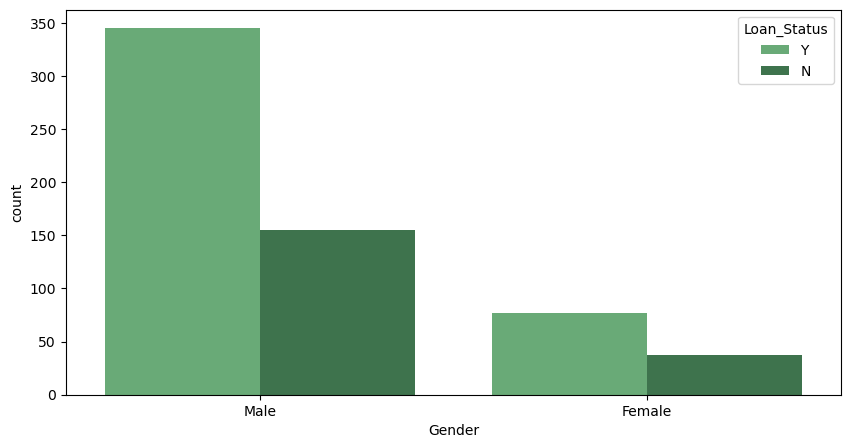

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender',data=data,hue='Loan_Status',palette='Greens_d')
plt.show()

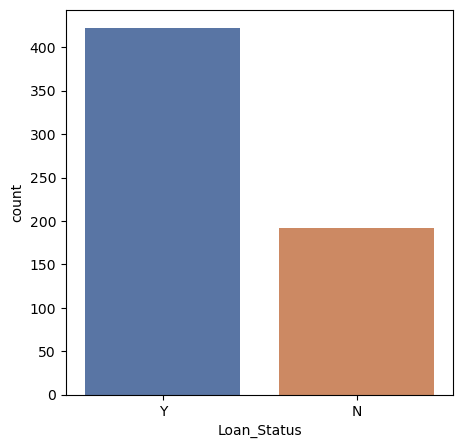

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(x='Loan_Status',data=data,palette='deep')
plt.show()

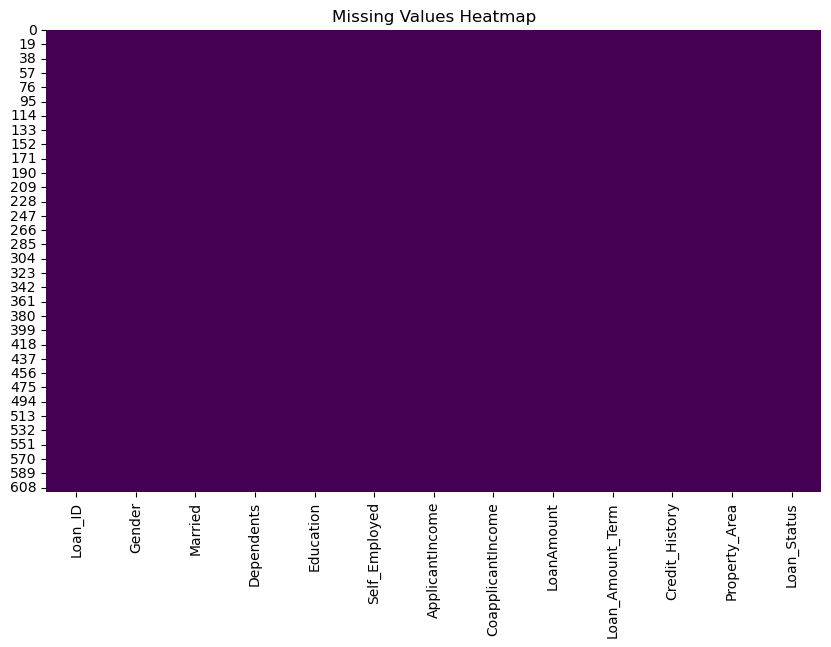

In [14]:
# Exploratory Data Analysis (EDA)
# Missing values analysis
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()









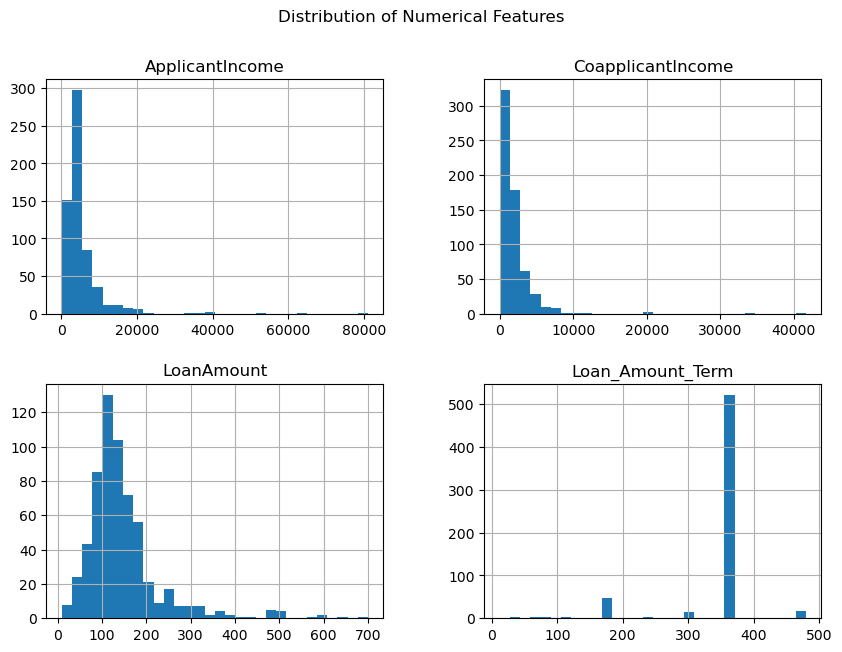

In [15]:
# Distribution of numerical features
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
data[numerical_features].hist(bins=30, figsize=(10, 7))
plt.suptitle('Distribution of Numerical Features')
plt.show()

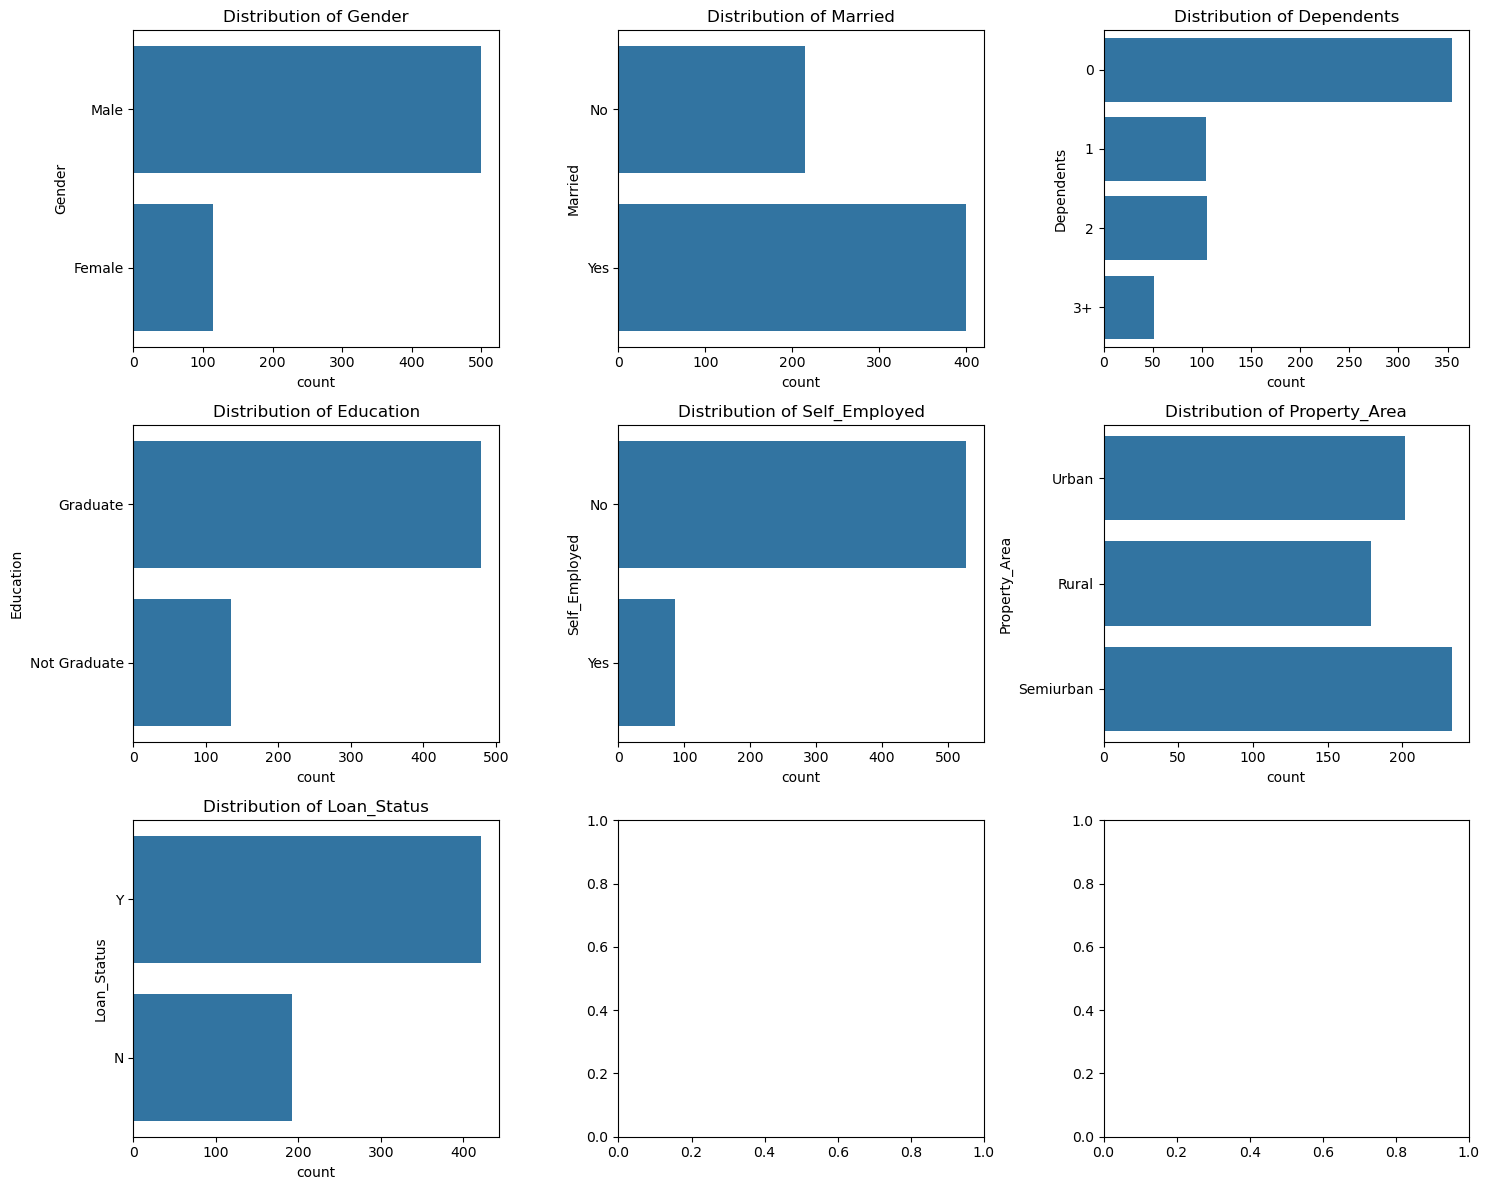

In [16]:
# Distribution of categorical features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
for i, feature in enumerate(categorical_features):
    sns.countplot(data[feature], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

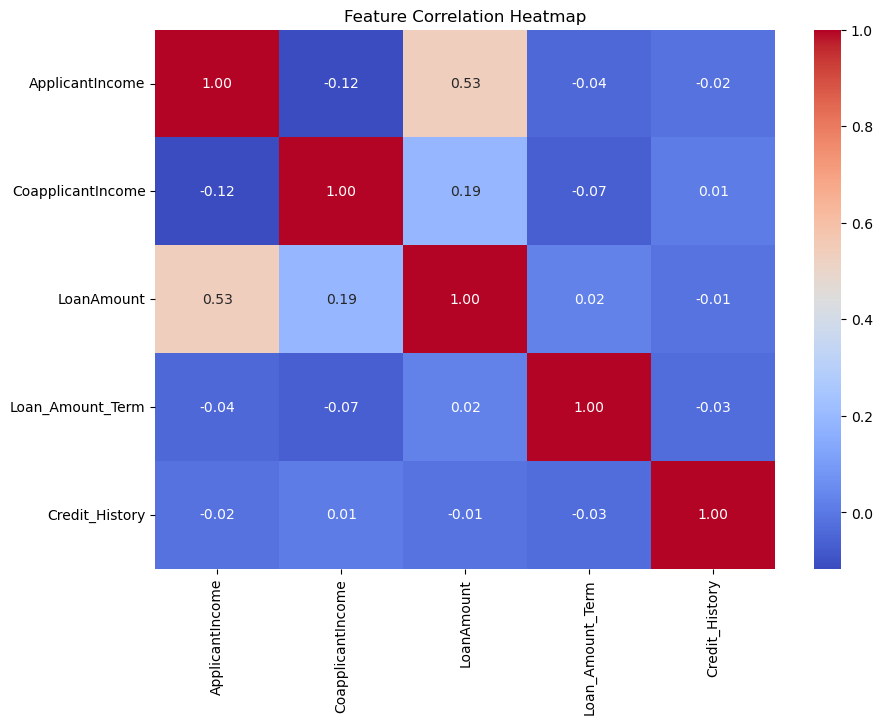

In [17]:
# Correlation heatmap
plt.figure(figsize=(10, 7))
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

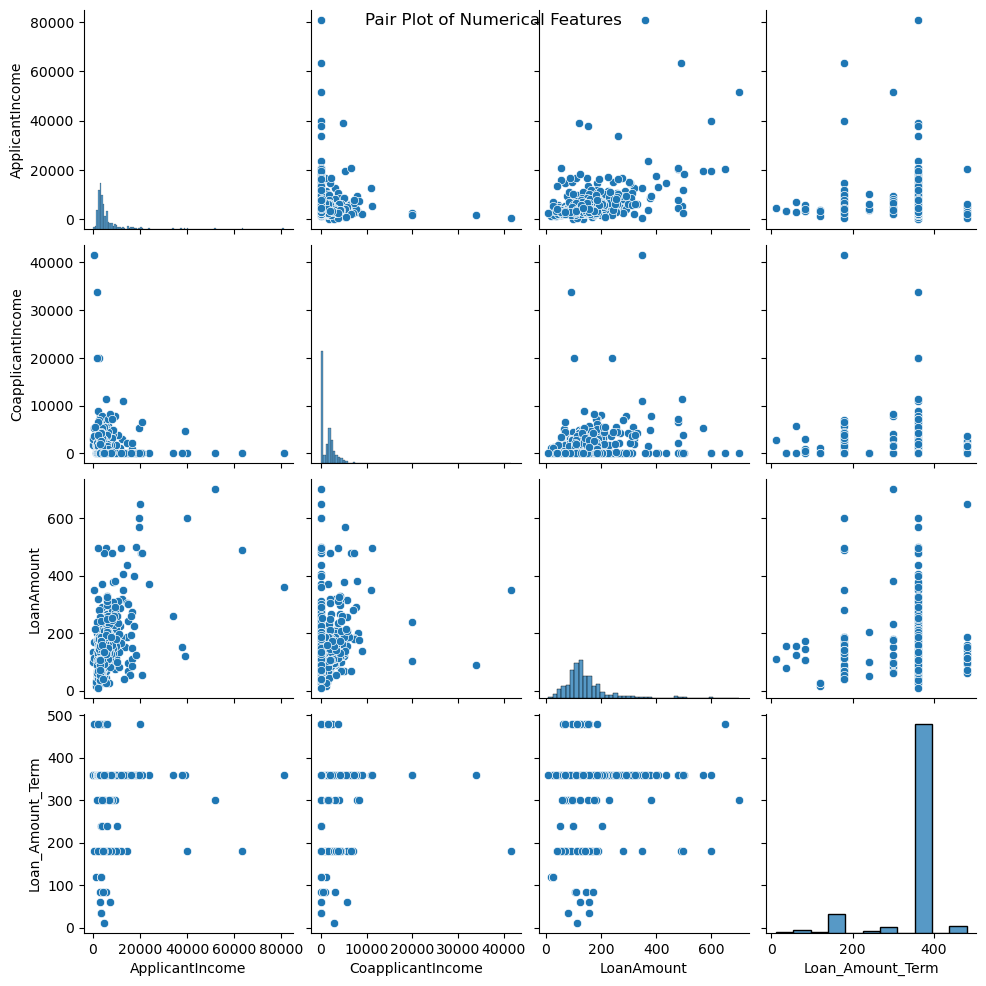

In [18]:
# Pair plot for detailed correlation analysis
sns.pairplot(data[numerical_features + ['Loan_Status']])
plt.suptitle('Pair Plot of Numerical Features')
plt.show()

In [19]:
# Handling missing values
imputer = SimpleImputer(strategy='median')
data['LoanAmount'] = imputer.fit_transform(data[['LoanAmount']])
data['Loan_Amount_Term'] = imputer.fit_transform(data[['Loan_Amount_Term']])
data['Credit_History'] = imputer.fit_transform(data[['Credit_History']])






In [20]:
# Encoding categorical variables
encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = encoder.fit_transform(data[column])

In [21]:
# Feature scaling
scaler = StandardScaler()
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [22]:
# Feature Engineering
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['Income_to_LoanRatio'] = data['TotalIncome'] / data['LoanAmount']

In [23]:
# Splitting the dataset into training and testing sets
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Model training
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

best_models = {}
for model_name in models:
    grid_search = GridSearchCV(estimator=models[model_name], param_grid=param_grids[model_name], cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}\n")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for RandomForest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}



Evaluation for RandomForest:
Accuracy: 0.7945945945945946
Precision: 0.7733333333333333
Recall: 0.9666666666666667
F1 Score: 0.8592592592592593
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.48      0.62        65
           1       0.77      0.97      0.86       120

    accuracy                           0.79       185
   macro avg       0.83      0.72      0.74       185
weighted avg       0.81      0.79      0.78       185

Confusion Matrix:
 [[ 31  34]
 [  4 116]]
ROC-AUC Score: 0.801923076923077 



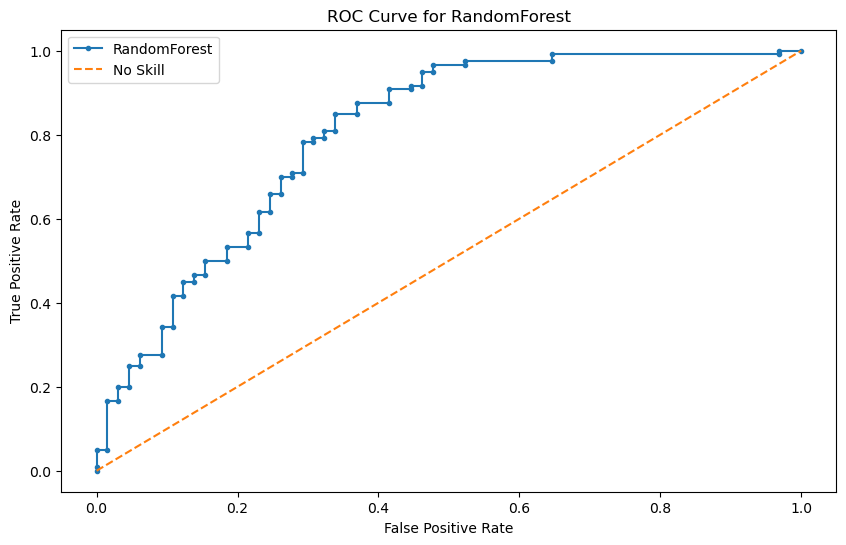

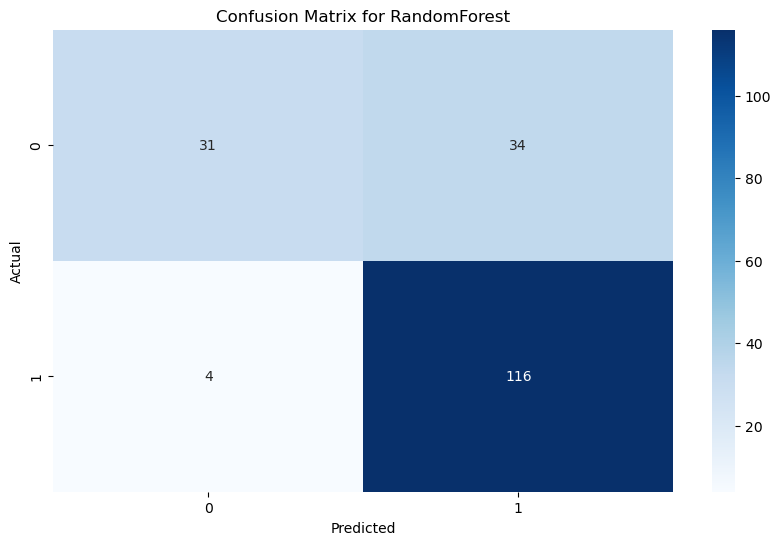

Evaluation for GradientBoosting:
Accuracy: 0.7837837837837838
Precision: 0.7702702702702703
Recall: 0.95
F1 Score: 0.8507462686567164
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.48      0.61        65
           1       0.77      0.95      0.85       120

    accuracy                           0.78       185
   macro avg       0.80      0.71      0.73       185
weighted avg       0.79      0.78      0.77       185

Confusion Matrix:
 [[ 31  34]
 [  6 114]]
ROC-AUC Score: 0.7501282051282051 



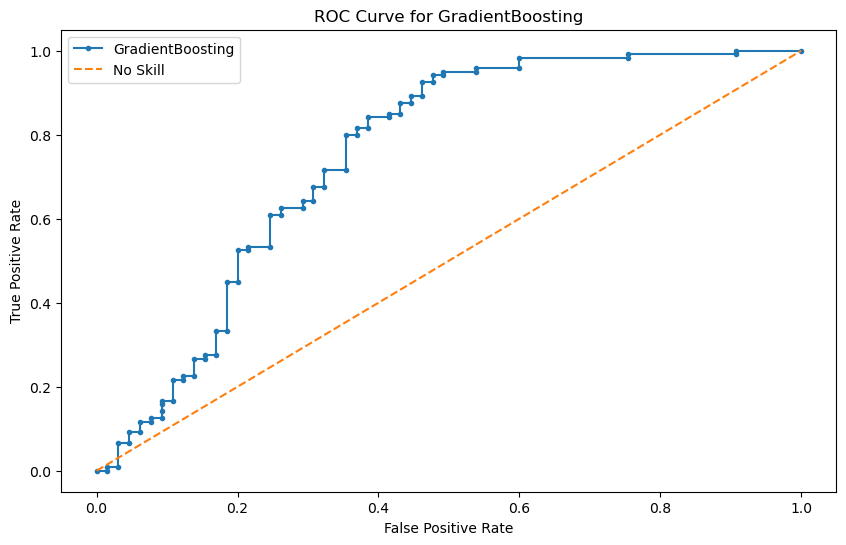

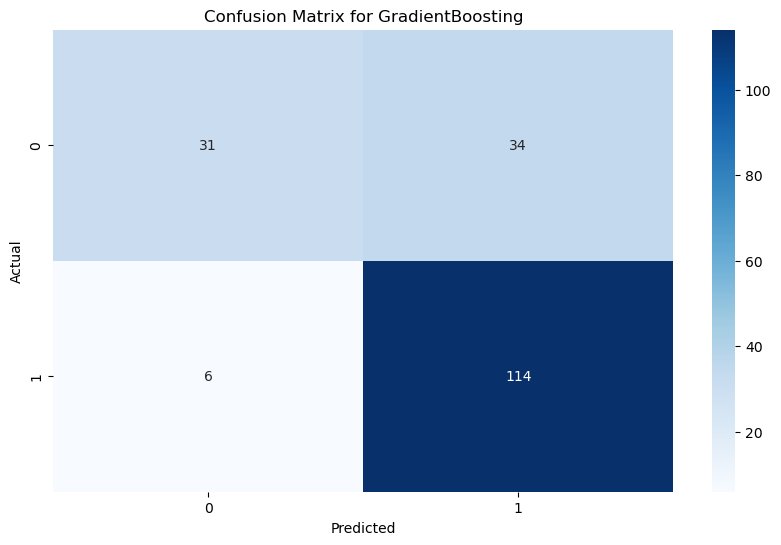

Evaluation for XGBoost:
Accuracy: 0.7837837837837838
Precision: 0.7597402597402597
Recall: 0.975
F1 Score: 0.8540145985401459
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.43      0.58        65
           1       0.76      0.97      0.85       120

    accuracy                           0.78       185
   macro avg       0.83      0.70      0.72       185
weighted avg       0.81      0.78      0.76       185

Confusion Matrix:
 [[ 28  37]
 [  3 117]]
ROC-AUC Score: 0.7543589743589743 



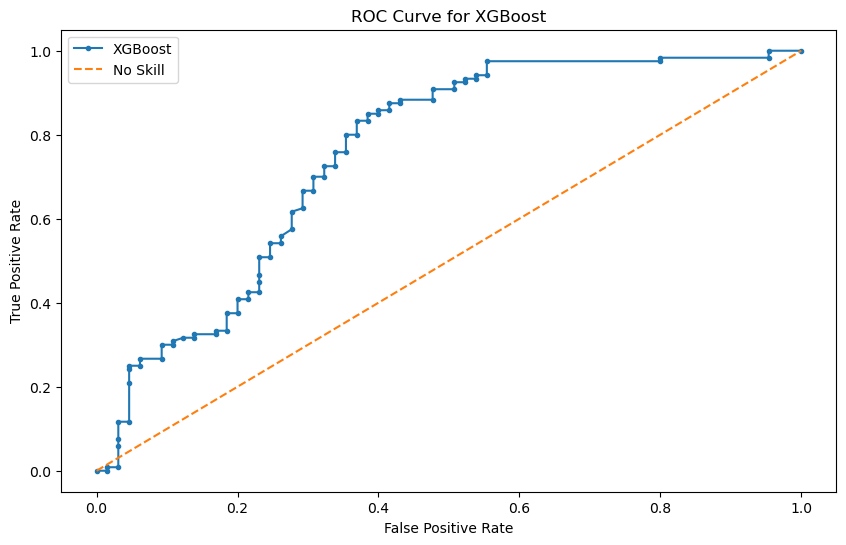

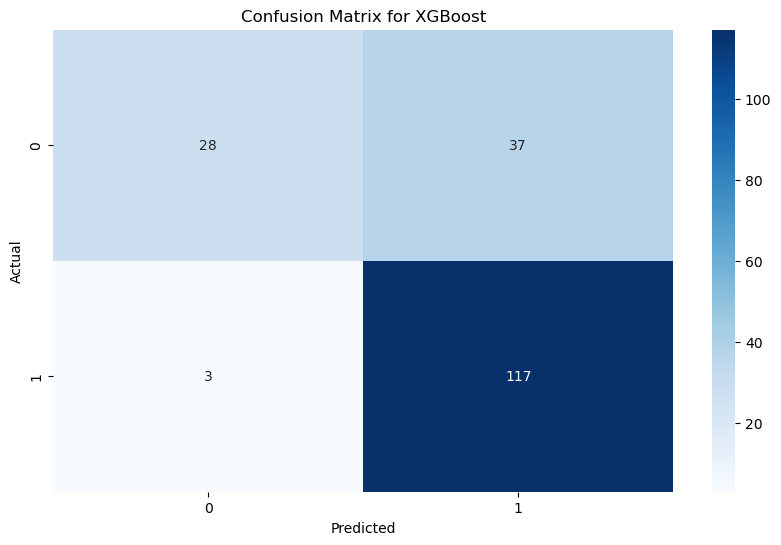

In [25]:
# Model evaluation
for model_name in best_models:
    model = best_models[model_name]
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    print(f"Evaluation for {model_name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba), "\n")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, marker='.', label=model_name)
    plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend()
    plt.show()

    # Confusion Matrix Heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()



